# Setup

In [55]:
import trig_poly
import dual_certificates
import phase_transition
import test_data
import numpy as np
import plt_util
from matplotlib import pyplot as plt

%matplotlib inline

# Example

In [56]:
reload(trig_poly)
reload(dual_certificates)
reload(test_data)

fc = 50

N = 50
min_separation = 0.75 / fc

gammas = [0.247, 0.339, 0.414]
kernel = trig_poly.TrigPoly.dirichlet(fc)
gamma_kernel = trig_poly.TrigPoly.multi_dirichlet(fc, gammas)

support = test_data.uniform_supports(N, min_separation=min_separation)
sign_pattern = test_data.uniform_sign_pattern_1d(N)

# interpolator_1 = dual_certificates.interpolate(support, sign_pattern, kernel)
interpolator_2 = dual_certificates.interpolate_with_derivative(support, sign_pattern, kernel)
interpolator_3 = dual_certificates.interpolate_with_derivative(support, sign_pattern, gamma_kernel)

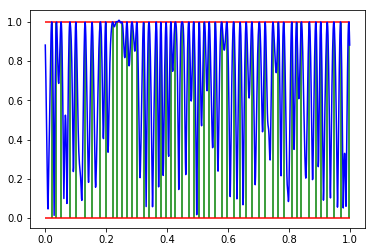

In [3]:
plt_util.plot_trig_poly_magnitude(interpolator_2, points=1000)
plt_util.plot_support_magnitude_lines(support)
plt_util.plot_magnitude_bounds()

23.4133799771


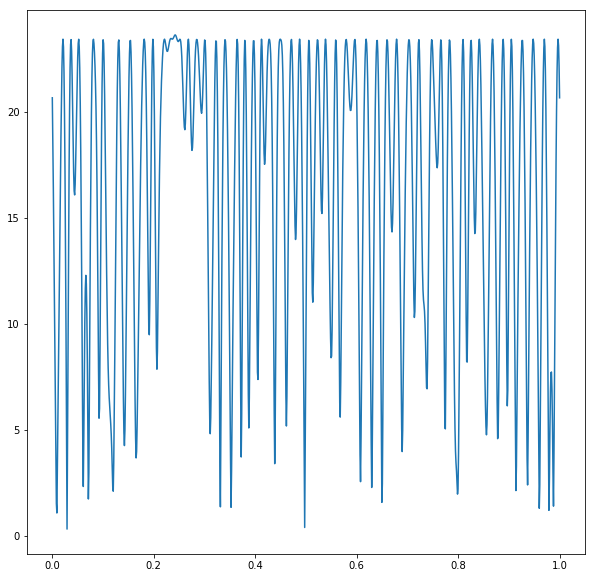

In [4]:
from numpy.polynomial import Polynomial as P

plt.subplots(figsize=(10, 10))

p = P(interpolator_2.coeffs)
roots = p.roots()
print 1 / np.absolute(interpolator_2.coeffs[-1])

ts = np.linspace(0.0, 1.0, 1000)
zs = np.exp(2 * np.pi * 1j * ts)
magnitudes = np.array([np.prod(np.absolute(roots - z)) for z in zs])
plt.plot(ts, magnitudes)

# plt.scatter(np.real(roots), np.imag(roots))
# xs = np.linspace(0, 2 * np.pi, 1000)
# plt.plot(np.cos(xs), np.sin(xs), color='red')
# plt.gca().set_aspect(1)

In [5]:
print min_separation
print min(
            np.min(support[1:] - support[:-1]),
            support[0] - support[-1] + 1.0)

0.015
0.0150675087206


In [58]:
N = 40
m = 20
fc = 50
min_separation = 0.54 / fc

kernel = trig_poly.TrigPoly.dirichlet(fc)

support = test_data.jittered_supports(N, min_separation=min_separation)

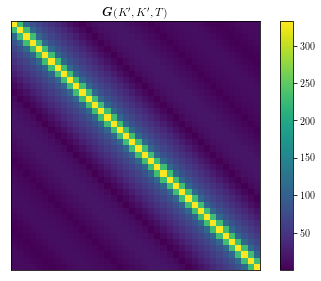

In [70]:
from matplotlib import rc

rc('text', usetex=True)
rc('text.latex', preamble='\\usepackage{bm}')

plt.imshow(np.absolute(kernel.derivative().inners_of_shifts(support)))
plt.colorbar()
plt.gca().set_title('$\\bm G(K^\\prime, K^\\prime, T)$')

plt.gca().set_xticks([])
plt.gca().set_yticks([])

plt.tight_layout()

plt.savefig('./img/kernel-derivative-gram.pdf')

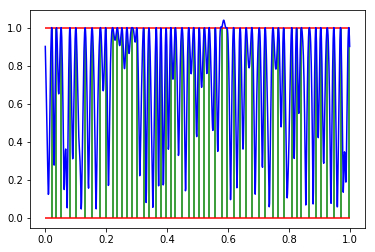

In [6]:
plt_util.plot_trig_poly_magnitude(interpolator_3, points=1000)
plt_util.plot_support_magnitude_lines(support)
plt_util.plot_magnitude_bounds()

In [7]:
print dual_certificates.validate(support, sign_pattern, interpolator_2)

{'status': False, 'max_deviation': 4.7203185361632732e-14, 'values_achieved': True, 'bound_achieved': False}


# Phase Transition: Real vs. Complex

In [8]:
reload(phase_transition)
reload(dual_certificates)
reload(test_data)

<module 'test_data' from 'test_data.pyc'>

In [9]:
fc = 50
sizes = range(1, 41)
separation_ratios = np.linspace(0.05, 1.0, 40)
separations = separation_ratios / fc

In [10]:
probs_complex = phase_transition.grid_probabilities(
    test_data.jittered_supports,
    test_data.uniform_sign_pattern_1d,
    trig_poly.TrigPoly.dirichlet(fc),
    dual_certificates.interpolate_with_derivative,
    sizes,
    separations,
    num_experiments=10,
    verbose=True)

0 0
0 1
0 2
0 3
0 4
0 5
0 6
0 7
0 8
0 9
0 10
0 11
0 12
0 13
0 14
0 15
0 16
0 17
0 18
0 19
0 20
0 21
0 22
0 23
0 24
0 25
0 26
0 27
0 28
0 29
0 30
0 31
0 32
0 33
0 34
0 35
0 36
0 37
0 38
0 39
1 0
1 1
1 2
1 3
1 4
1 5
1 6
1 7
1 8
1 9
1 10
1 11
1 12
1 13
1 14
1 15
1 16
1 17
1 18
1 19
1 20
1 21
1 22
1 23
1 24
1 25
1 26
1 27
1 28
1 29
1 30
1 31
1 32
1 33
1 34
1 35
1 36
1 37
1 38
1 39
2 0
2 1
2 2
2 3
2 4
2 5
2 6
2 7
2 8
2 9
2 10
2 11
2 12
2 13
2 14
2 15
2 16
2 17
2 18
2 19
2 20
2 21
2 22
2 23
2 24
2 25
2 26
2 27
2 28
2 29
2 30
2 31
2 32
2 33
2 34
2 35
2 36
2 37
2 38
2 39
3 0
3 1
3 2
3 3
3 4
3 5
3 6
3 7
3 8
3 9
3 10
3 11
3 12
3 13
3 14
3 15
3 16
3 17
3 18
3 19
3 20
3 21
3 22
3 23
3 24
3 25
3 26
3 27
3 28
3 29
3 30
3 31
3 32
3 33
3 34
3 35
3 36
3 37
3 38
3 39
4 0
4 1
4 2
4 3
4 4
4 5
4 6
4 7
4 8
4 9
4 10
4 11
4 12
4 13
4 14
4 15
4 16
4 17
4 18
4 19
4 20
4 21
4 22
4 23
4 24
4 25
4 26
4 27
4 28
4 29
4 30
4 31
4 32
4 33
4 34
4 35
4 36
4 37
4 38
4 39
5 0
5 1
5 2
5 3
5 4
5 5
5 6
5 7
5 8
5 9
5 10
5 11


In [11]:
probs_real = phase_transition.grid_probabilities(
    test_data.jittered_supports,
    test_data.uniform_sign_pattern_1d_real,
    trig_poly.TrigPoly.dirichlet(fc),
    dual_certificates.interpolate_with_derivative,
    sizes,
    separations,
    num_experiments=10,
    verbose=True)

0 0
0 1
0 2
0 3
0 4
0 5
0 6
0 7
0 8
0 9
0 10
0 11
0 12
0 13
0 14
0 15
0 16
0 17
0 18
0 19
0 20
0 21
0 22
0 23
0 24
0 25
0 26
0 27
0 28
0 29
0 30
0 31
0 32
0 33
0 34
0 35
0 36
0 37
0 38
0 39
1 0
1 1
1 2
1 3
1 4
1 5
1 6
1 7
1 8
1 9
1 10
1 11
1 12
1 13
1 14
1 15
1 16
1 17
1 18
1 19
1 20
1 21
1 22
1 23
1 24
1 25
1 26
1 27
1 28
1 29
1 30
1 31
1 32
1 33
1 34
1 35
1 36
1 37
1 38
1 39
2 0
2 1
2 2
2 3
2 4
2 5
2 6
2 7
2 8
2 9
2 10
2 11
2 12
2 13
2 14
2 15
2 16
2 17
2 18
2 19
2 20
2 21
2 22
2 23
2 24
2 25
2 26
2 27
2 28
2 29
2 30
2 31
2 32
2 33
2 34
2 35
2 36
2 37
2 38
2 39
3 0
3 1
3 2
3 3
3 4
3 5
3 6
3 7
3 8
3 9
3 10
3 11
3 12
3 13
3 14
3 15
3 16
3 17
3 18
3 19
3 20
3 21
3 22
3 23
3 24
3 25
3 26
3 27
3 28
3 29
3 30
3 31
3 32
3 33
3 34
3 35
3 36
3 37
3 38
3 39
4 0
4 1
4 2
4 3
4 4
4 5
4 6
4 7
4 8
4 9
4 10
4 11
4 12
4 13
4 14
4 15
4 16
4 17
4 18
4 19
4 20
4 21
4 22
4 23
4 24
4 25
4 26
4 27
4 28
4 29
4 30
4 31
4 32
4 33
4 34
4 35
4 36
4 37
4 38
4 39
5 0
5 1
5 2
5 3
5 4
5 5
5 6
5 7
5 8
5 9
5 10
5 11


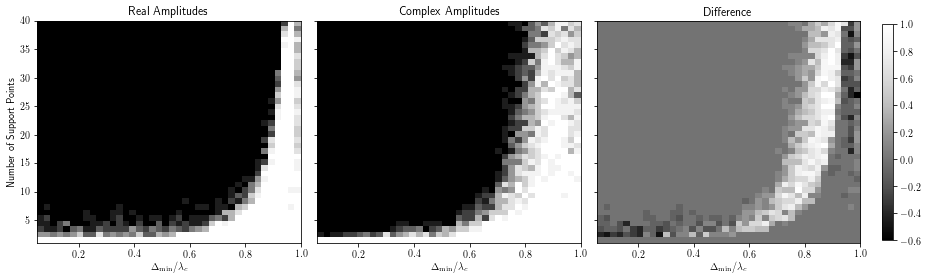

In [54]:
from matplotlib import rc

rc('text', usetex=True)

imshow_kwargs = {
    'cmap': 'Greys_r', 
    'extent': [separation_ratios[0], separation_ratios[-1], sizes[0], sizes[-1]], 
    'aspect': 'auto'}

fig, axes = plt.subplots(1, 3, figsize=(15, 4))

axes[0].imshow(np.flip(probs_real, axis=0), **imshow_kwargs)
axes[0].set_title('Real Amplitudes')
axes[0].set_ylabel('Number of Support Points')
axes[0].set_xlabel('$\\Delta_{\\min} / \\lambda_c$')

axes[1].imshow(np.flip(probs_complex, axis=0), **imshow_kwargs)
axes[1].set_title('Complex Amplitudes')
axes[1].set_yticklabels([])
axes[1].set_xlabel('$\\Delta_{\\min} / \\lambda_c$')

im = axes[2].imshow(np.flip(probs_complex - probs_real, axis=0), **imshow_kwargs)
axes[2].set_title('Difference')
axes[2].set_yticklabels([])
axes[2].set_xlabel('$\\Delta_{\\min} / \\lambda_c$')

cbar_ax = fig.add_axes([0.82, 0.15, 0.01, 0.75])
fig.colorbar(im, cax=cbar_ax)

plt.tight_layout()

fig.subplots_adjust(right=0.8)

plt.savefig('./img/real-vs-complex.pdf')

# Timing

In [1]:
%load_ext line_profiler

In [12]:
reload(dual_certificates)
reload(trig_poly)
fc = 30

In [13]:
%lprun -f dual_certificates.interpolate_with_derivative phase_transition.grid_probabilities(test_data.uniform_supports, test_data.uniform_sign_pattern_1d, trig_poly.TrigPoly.dirichlet(fc), dual_certificates.interpolate_with_derivative,[20],[0.5 / float(fc)],num_experiments=10,verbose=True)

0 0
